In [1]:
# import everything

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# load the data

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# [60000, 28, 28], [10000, 28, 28], [60000, ], [10000, ]

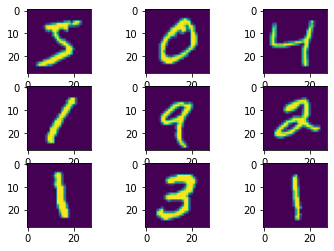

In [3]:
# plot the figures to be sure the dataset is loading correctly

plt.figure()
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
plt.savefig("should_be_digits_please")

In [4]:
img = np.array(x_train[0])
print(img.shape)

(28, 28)


In [5]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1440954109332811127
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4376821760
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13032009671271054346
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [6]:
# define model

dim = [(28 * 28,), 512, 512, 10]
#input, first layer, second layer,output

def makeModel(dim):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=dim[0]))
    model.add(keras.layers.Dense(dim[1], activation="relu"))
    model.add(keras.layers.Dense(dim[2], activation="relu"))
    model.add(keras.layers.Dense(dim[3], activation="softmax"))
    return model

model = makeModel(dim)
print(model.output_shape) # should be 10

(None, 10)


In [7]:
# compiling

optimizerMethod = "adam"
lossFunction = "categorical_crossentropy"
metricsLst = ["accuracy"]
model.compile(optimizer=optimizerMethod, loss=lossFunction, metrics=metricsLst)

In [8]:
# clean and organize the data
x_train = x_train.reshape(60000, 28 * 28)
x_test = x_test.reshape(10000, 28 * 28)

nClass = 10
y_train = keras.utils.to_categorical(y_train, nClass)
y_test = keras.utils.to_categorical(y_test, nClass)

In [9]:
# train the model

model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=2, validation_data=(x_test, y_test))

Epoch 1/20
469/469 - 1s - loss: 2.6125 - accuracy: 0.9021 - val_loss: 0.5141 - val_accuracy: 0.9434
Epoch 2/20
469/469 - 0s - loss: 0.3335 - accuracy: 0.9549 - val_loss: 0.4246 - val_accuracy: 0.9351
Epoch 3/20
469/469 - 0s - loss: 0.1998 - accuracy: 0.9669 - val_loss: 0.2782 - val_accuracy: 0.9591
Epoch 4/20
469/469 - 0s - loss: 0.1682 - accuracy: 0.9703 - val_loss: 0.3228 - val_accuracy: 0.9578
Epoch 5/20
469/469 - 0s - loss: 0.1379 - accuracy: 0.9754 - val_loss: 0.2897 - val_accuracy: 0.9580
Epoch 6/20
469/469 - 0s - loss: 0.1153 - accuracy: 0.9775 - val_loss: 0.2890 - val_accuracy: 0.9585
Epoch 7/20
469/469 - 0s - loss: 0.1130 - accuracy: 0.9782 - val_loss: 0.2352 - val_accuracy: 0.9633
Epoch 8/20
469/469 - 0s - loss: 0.0994 - accuracy: 0.9801 - val_loss: 0.2828 - val_accuracy: 0.9614
Epoch 9/20
469/469 - 0s - loss: 0.1004 - accuracy: 0.9791 - val_loss: 0.2253 - val_accuracy: 0.9619
Epoch 10/20
469/469 - 0s - loss: 0.0740 - accuracy: 0.9826 - val_loss: 0.2016 - val_accuracy: 0.9623

In [10]:
# evaluate

results = model.evaluate(x_test, y_test, verbose=2)
print("Loss: ", results[0])
print("Accuracy: ", results[1])

313/313 - 0s - loss: 0.1658 - accuracy: 0.9714
Loss:  0.165761798620224
Accuracy:  0.9714000225067139


In [11]:
# save the model
# model = tf.keras.applications.mobilenet.MobileNet(input_shape=(1, 28 * 28, 3), weights=None)
model.save('handwritten_model')

INFO:tensorflow:Assets written to: handwritten_model/assets


In [12]:
# delete current model to try loading it in
# del model
model = keras.models.load_model('handwritten_model', compile=True)

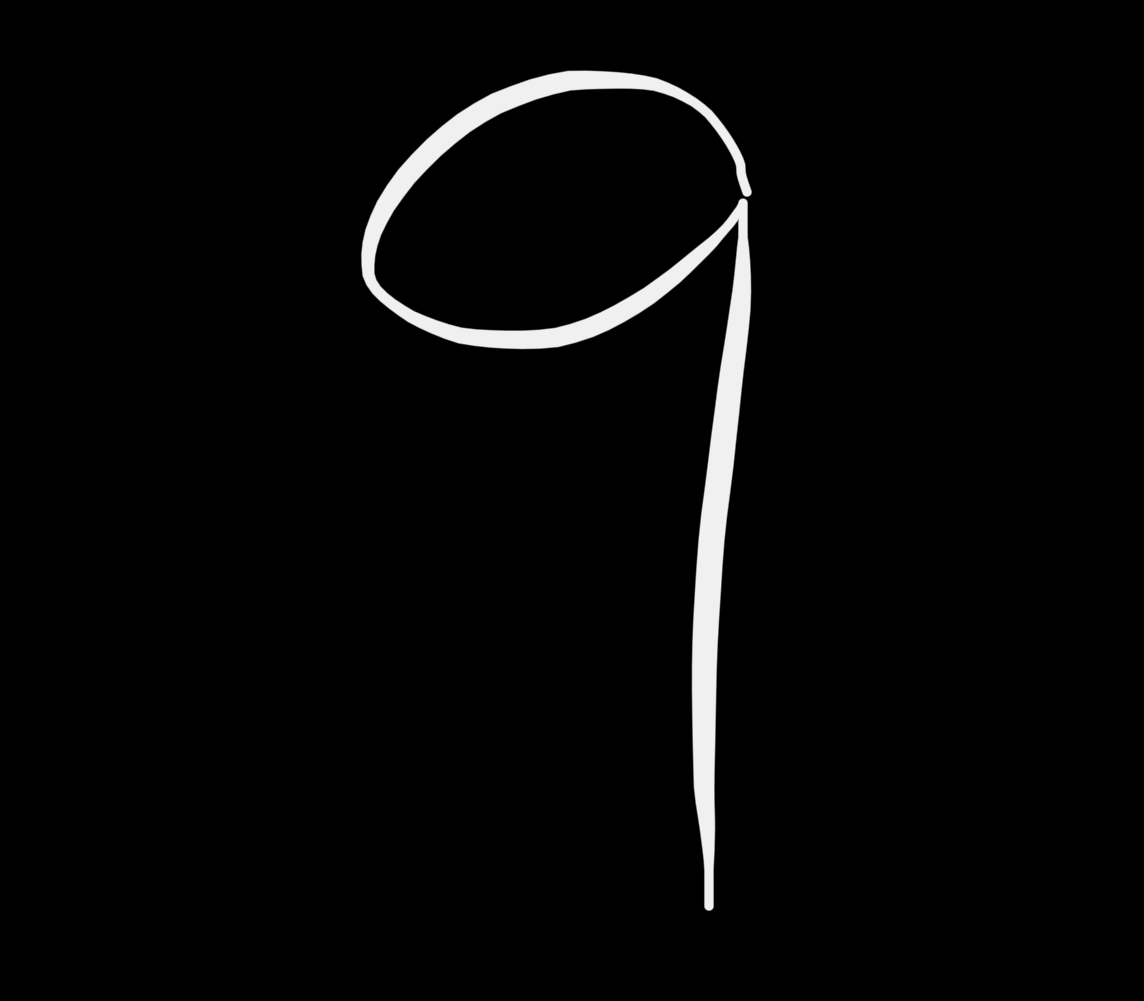

(1144, 1001)


In [52]:
# load in test image and resize
import PIL

sample = PIL.Image.open("9.jpg")
dim = (28, 28)
sample.show()
print(sample.size)
sample = sample.resize(dim)
sample.show()

(28, 28)
uint8


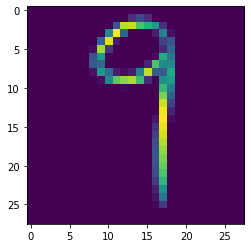

In [57]:
# process image
predict_sample = np.array(sample)
predict_sample = predict_sample[:, :, 0]
print(predict_sample.shape)
plt.imshow(predict_sample)
predict_sample = predict_sample.reshape(1, 28 * 28)
print(predict_sample.dtype)

In [58]:
# predict
prediction = model.predict(predict_sample)
print(prediction)

classes = np.argmax(prediction, axis = 1)
print(classes)

[[1.7534543e-04 4.3846872e-02 1.8844754e-01 7.4486956e-02 1.4644855e-05
  1.5271469e-03 4.4529629e-06 6.9091463e-01 1.9972761e-04 3.8262710e-04]]
[7]
